# Egg Classification

In [2]:
import os
from dotenv import load_dotenv
from inference_sdk import InferenceHTTPClient

# Load the environment variables from the .env file
load_dotenv()

# Retrieve the API key
api_key = os.getenv("ROBLOFLOW_API_KEY")

# Initialize the InferenceHTTPClient with the API key
CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key=api_key
)
# infer on a local image
result = CLIENT.infer(r"C:\Users\Hp\Desktop\Capture.jpg", model_id="egg-classification-xppva/4")

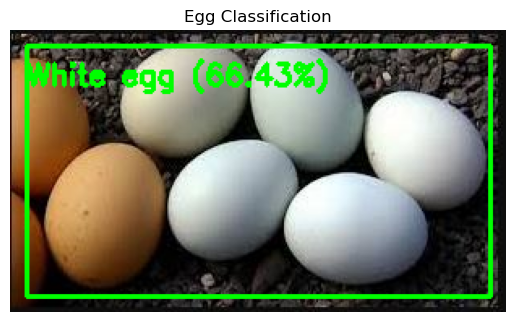

Annotated image saved at C:\Users\Hp\Desktop\Capture_Annotated.jpg


In [7]:
import cv2
import numpy as np
import json


# Load the image
image_path = r"C:\Users\Hp\Desktop\Capture.jpg"  # Update with your image path
image = cv2.imread(image_path)

if image is None:
    raise FileNotFoundError(f"Image not found at {image_path}")

# Get image dimensions
image_height, image_width = image.shape[:2]

# Dummy rectangle coordinates for visualization (replace with actual bounding box info if available)
# Assuming the egg takes up the majority of the image
x1, y1, x2, y2 = 10, 10, image_width - 10, image_height - 10

# Get the top prediction (highest confidence score)
predictions = result['predictions']
top_prediction = max(predictions.items(), key=lambda x: x[1]['confidence'])
egg_type = top_prediction[0]
confidence = top_prediction[1]['confidence']

# Draw the rectangle
color = (0, 255, 0)  # Green
thickness = 2
cv2.rectangle(image, (x1, y1), (x2, y2), color, thickness)

# Annotate the image with the detected egg type
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.6
font_thickness = 2
text = f"{egg_type} ({confidence*100:.2f}%)"

# Calculate text size to position it nicely above the rectangle
(text_width, text_height), baseline = cv2.getTextSize(text, font, font_scale, font_thickness)
text_x = x1
text_y = y1 - 10 if y1 - 10 > text_height else y1 + text_height + 10

# Put the text
cv2.putText(image, text, (text_x, text_y), font, font_scale, color, font_thickness)

# Display the image (optional)
import matplotlib.pyplot as plt

# Convert the image from BGR (OpenCV format) to RGB (Matplotlib format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.axis('off')  # Hide axis
plt.title("Egg Classification")
plt.show()

# Save the image with annotations
output_path = r"C:\Users\Hp\Desktop\Capture_Annotated.jpg"
cv2.imwrite(output_path, image)
print(f"Annotated image saved at {output_path}")